# Feature Engineering & Correlation Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
input_df = pd.read_csv(r'.\Data\train_processed.csv')

#### Size of Data Set

In [3]:
input_df.shape

(891, 13)

#### What are attributes?

In [4]:
input_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_'],
      dtype='object')

#### A glance at data

In [5]:
input_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


##### Descriptive statistics

In [6]:
input_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.125892,13.089085,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Cabin_,891.0,0.228956,0.420397,0.00,0.0000,0.0000,0.0,1.0000


In [7]:
input_df.describe(include=np.object).T

,count,unique,top,freq
Name,891,891,"Lang, Mr. Fang",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,C23 C25 C27,4
Embarked,891,3,S,646


#### Missing Data

In [8]:
for _ in input_df.columns:
    print('Nmber of nulls in '  + _ + ' - ' + str(input_df[_].isnull().sum() ))

Nmber of nulls in PassengerId - 0
Nmber of nulls in Survived - 0
Nmber of nulls in Pclass - 0
Nmber of nulls in Name - 0
Nmber of nulls in Sex - 0
Nmber of nulls in Age - 0
Nmber of nulls in SibSp - 0
Nmber of nulls in Parch - 0
Nmber of nulls in Ticket - 0
Nmber of nulls in Fare - 0
Nmber of nulls in Cabin - 687
Nmber of nulls in Embarked - 0
Nmber of nulls in Cabin_ - 0


### Feature Engineering

#### Length of Name

In [9]:
input_df['NameLength'] = input_df['Name'].apply(len)

##### Family size

In [10]:
input_df['familySize'] = input_df['SibSp'] + input_df['Parch'] + 1

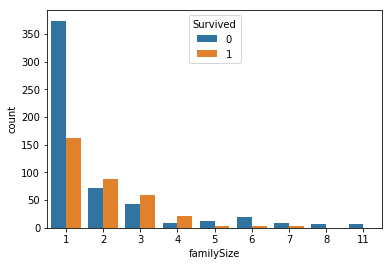

In [11]:
sns.countplot(x = 'familySize', data=input_df, hue='Survived')

##### Is alone?

In [12]:
input_df['isAlone'] = input_df['familySize'].apply(lambda x: 1 if x == 1 else 0)

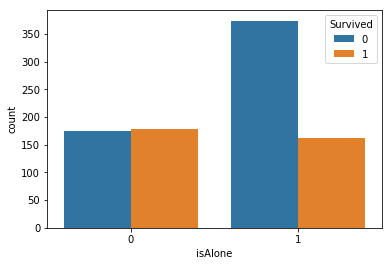

In [13]:
sns.countplot(x = 'isAlone', data=input_df, hue='Survived')

In [14]:
input_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_', 'NameLength',
       'familySize', 'isAlone'],
      dtype='object')

In [15]:
del input_df['PassengerId']

##### Categorize fare paid by passenger

In [16]:
input_df['fareGroup'] = pd.cut(input_df.Fare, bins = 4, labels=[1,2,3,4])

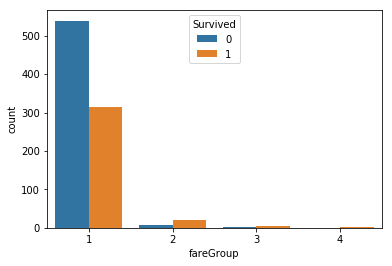

In [17]:
sns.countplot(x = 'fareGroup', data=input_df, hue='Survived')

### Correlation Analysis

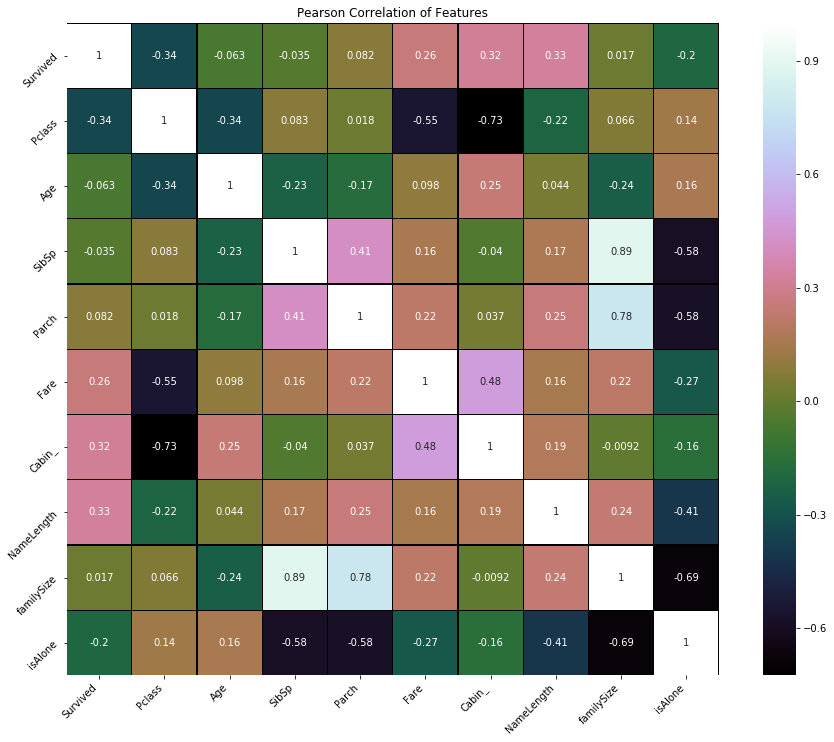

In [20]:
fig, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of Features')

sns.heatmap(input_df.corr(), linewidths=0.25, vmax=1.0, square=True, cmap="cubehelix",
            linecolor='k', annot=True)

ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=45)
ax.grid(False)
plt.savefig(r'.\Media\Pearson Correlation of Features.png')

In [19]:
input_df.to_csv(r'.\Data\train_processed_featurified.csv', index=False, encoding='utf-8')